In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2
from random import sample
import math
from pandas.api.types import CategoricalDtype

In [2]:
def get_fdpn(dataset, column):
    """
    Returns norm function from a given dataset and column.
    """
    described = dataset[column].describe()
    mean = described['mean']
    std = described['std']
    return norm(mean, std)

In [3]:
dataset = pd.read_csv('../datasets/responses.csv')
dataset_cols = pd.read_csv('../datasets/columns.csv')

## Introducción
En este trabajo se realizarán análisis estadísticos e inferenciales sobre una muestra dada, disponible en [este link](https://www.kaggle.com/jkokatjuhha/we-are-from-our-childhood).

En un primer momento se analizarán variables numéricas en varios aspectos, para continuar con un análisis de variables categóricas. En ambos casos se tomaron de ejemplo variables particulares con el fin de realizar gráficos y obtener valores específicos. Al final del trabajo se encuentran algunas funciones que relacionan los grupos de variables de todo el dataset.

Las variables que tomamos como ejemplo son:
* Numéricas: _Edad_ y _Peso_
* Categóricas: _tipo de fumador_ y _tipo de consumidor de alcohol_


## Variables numéricas


## Cálculos de estadísticos principales
A continuación se calculan los estadísticos principales para dar una idea general de las variables elegidas.

In [4]:
age_weight = dataset[['Age','Weight']]
mode = age_weight.mode('index')
res = age_weight.describe()
res = res.drop(res.index[[0, 3, 4, 6, 7]]).append(mode)
res.rename({'mean': 'media', 'std': 'desv_estd', '50%': 'mediana', 0: 'moda'}, axis='index')

,Age,Weight
media,20.433699,66.405051
desv_estd,2.828840,13.839561
mediana,20.000000,64.000000
moda,19.000000,60.000000


## Análisis de distribución de probabilidad

Se desea conocer el tipo de distribución de probabilidad subyacente a la muestra para las variables en estudio. Para ello se realiza un análisis cualitativo y cuantitativo, apelando a la ayuda de gráficos.

A continuación se presentan gráficos de Edad y Peso de la muestra contrastado con una distribución normal con los parámetros muestrales para cada variable. Se muestra en rojo lo que sería una distribución normal.

Text(0.5,1,'Distribución de probabilidad de Edad')

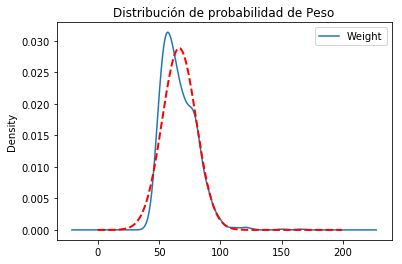

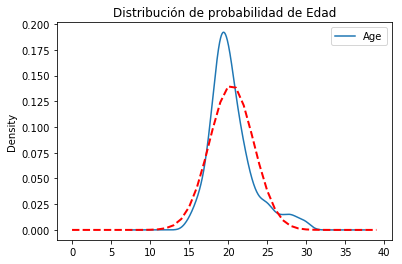

In [5]:
dataset[['Weight']].plot.kde()
# mu_weight = res['Weight']['mean']
# sigma_weight = res['Weight']['std']
# dn_weight = norm(mu_weight, sigma_weight)
dn_weight = get_fdpn(dataset[['Weight']], 'Weight')
rng_weight = range(0, 200)
plt.plot(rng_weight, dn_weight.pdf(rng_weight), 'r--', linewidth=2)
plt.title('Distribución de probabilidad de Peso')


dataset[['Age']].plot.kde()
# mu_age = res['Age']['mean']
# sigma_age = res['Age']['std']
# dn_age = norm(mu_age, sigma_age)
dn_age = get_fdpn(dataset[['Age']], 'Age')
rng_age = range(0, 40)
plt.plot(rng_age, dn_age.pdf(rng_age), 'r--', linewidth=2)
plt.title('Distribución de probabilidad de Edad')

Se puede apreciar en los gráficos una adecuación muy parcial y forzada a lo que sería una distribución normal. Se pueden ver varios picos asomando, a diferencia de lo suave de la campana gaussiana. En particular, la distribución de probabilidad del Peso se pueden notar dos picos, lo cual podría indicar la presencia de una distribución normal mixta.


## Desdoblando por género

Repitamos el experimento desdoblando los gráficos por género. En el caso de los hombres, el peso y la edad quedan de la siguiente forma. Se muestra en rojo lo que sería una distribución normal.

Text(0.5,1,'Distribución de probabilidad de Edad de Mujeres')

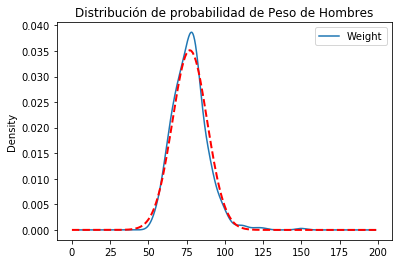

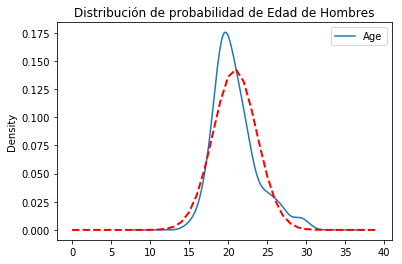

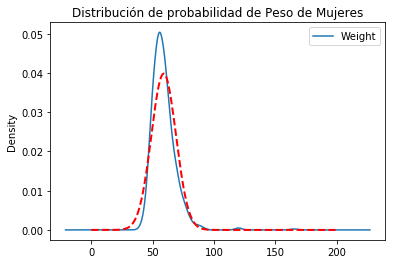

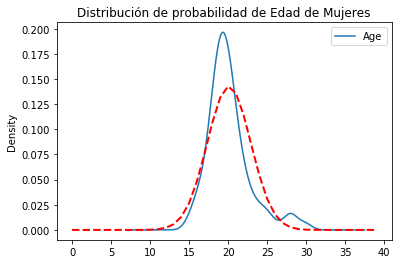

In [6]:
# TODO: plt.subplots(sharey='row', sharex='column')
male_weight_dataset = dataset[dataset.Gender=='male'][['Weight']]
male_weight_dataset.plot.kde()
dn_weight = get_fdpn(male_weight_dataset, 'Weight')
rng_weight = range(0, 200)
plt.plot(rng_weight, dn_weight.pdf(rng_weight), 'r--', linewidth=2, label='normal')
plt.title('Distribución de probabilidad de Peso de Hombres')

male_age_dataset = dataset[dataset.Gender=='male'][['Age']]
male_age_dataset.plot.kde()
dn_age = get_fdpn(male_age_dataset, 'Age')
rng_age = range(0, 40)
plt.plot(rng_age, dn_age.pdf(rng_age), 'r--', linewidth=2)
plt.title('Distribución de probabilidad de Edad de Hombres')

female_weight_datasetma = dataset[dataset.Gender=='female'][['Weight']]
female_weight_datasetma.plot.kde()
dn_weight = get_fdpn(female_weight_datasetma, 'Weight')
rng_weight = range(0, 200)
plt.plot(rng_weight, dn_weight.pdf(rng_weight), 'r--', linewidth=2)
plt.title('Distribución de probabilidad de Peso de Mujeres')

female_age_dataset = dataset[dataset.Gender=='female'][['Age']]
female_age_dataset.plot.kde()
dn_age = get_fdpn(female_age_dataset, 'Age')
rng_age = range(0, 40)
plt.plot(rng_age, dn_age.pdf(rng_age), 'r--', linewidth=2)
plt.title('Distribución de probabilidad de Edad de Mujeres')

Una vez desdoblado por genero se puede ver mejor que responde a una distribucion normal.

Desde un análisis cualitativo, se puede decir que la edad y la altura siguen una distribución normal para muestras aleatorias. En el caso de la muestra trabajada se debería poder afirmar lo mismo, ya que la muestra no presentó grandes sesgos a la hora de su relevamiento.

Apreciando la información de los gráficos se puede afirmar que, si antes de un desdoblamiento por sexo se podía apreciar algo parecido a una distribución normal mixta (dos picos de campana solapados), despues de dicho desdoblamiento se puede ver que se los datos se ajustan mejor una distribución normal sobre los parámetros discriminados por género.



## Análisis de Outliers


Los outlieres son los valores atipicos de la muestra. Los calculamos como los valores cuya diferencia a la media se encuentran a mas de 3 desviaciones estandar. Suelen ser provocados por ruido en el conjunto de datos, en cuyo caso, se deben suavizar o eliminar para no transferir ruido a las mediciones efectuadas.


En nuestro caso particular, luego de un análisis cualitativo, no consideramos que el origen de los outliers **sea ruido o malos datos**; sino que la reducida cantidad de outlieres puede atribuirse a una distribución subyacente con baja probabilidad sobre valores extremos. (9 outliers de ~1000 muestras < 1%).
Como se dijo antes, los _outliers_ pueden ser el resultado de errores de medición o registro, o el resultado involuntario y veraz resultante de la definición del conjunto. Sin embargo no consideramos que ese sea el caso.

In [7]:
outliers_weight = dataset[(np.abs(dataset.Weight-dataset.Weight.mean())>(3*dataset.Weight.std()))]
outliers_weight = outliers_weight[outliers_weight.Weight.notnull()]
outliers_age = dataset[(np.abs(dataset.Age-dataset.Age.mean())>(3*dataset.Age.std()))]
outliers_age = outliers_age[outliers_age.Age.notnull()]
both_outliers = outliers_age.merge(outliers_weight, how='inner')

print(outliers_weight[-20:]) # TODO: Printear columnas significativas de los outliners, para ver que las filas son buenas.
print(outliers_age)

     Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
292    5.0                       4.0    5.0   2.0      3.0              2.0   
612    5.0                       3.0    5.0   1.0      1.0              3.0   
715    4.0                       3.0    2.0   3.0      3.0              3.0   
793    2.0                       3.0    3.0   1.0      2.0              3.0   
796    3.0                       5.0    3.0   2.0      2.0              4.0   
859    5.0                       3.0    4.0   4.0      2.0              3.0   
885    3.0                       4.0    3.0   2.0      2.0              2.0   
973    5.0                       3.0    2.0   5.0      5.0              4.0   
992    4.0                       4.0    4.0   1.0      4.0              4.0   

     Musical  Pop  Rock  Metal or Hardrock           ...             Age  \
292      5.0  5.0   4.0                1.0           ...            21.0   
612      2.0  3.0   4.0                3.0           ... 

Se pueden apreciar graficamente los outliers en box plots. A continuación se muestran tales gráficos.

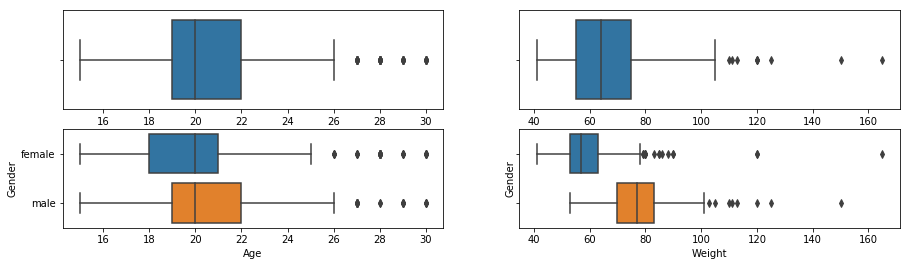

In [8]:
fix, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 4), sharey='row')
sns.boxplot(x="Age", data=dataset, ax=ax[0][0])
sns.boxplot(x="Weight", data=dataset, ax=ax[0][1])
sns.boxplot(x="Age", y="Gender", data=dataset, ax=ax[1][0])
sns.boxplot(x="Weight", y="Gender", data=dataset, ax=ax[1][1])

## Análisis de correlación


Con respecto a la correlación entre ambas variables, damos 3 gráficos diferentes para el análisis. En los tres se realiza una regresión lineal para practicar una correlación entre las variables. En los _scatter plots_ (en azul) se puede ver una gran dispersión en los datos, haciendo dificil establecer una correlación. Esto coincide con un coeficiente de Pearson bajo (0.24). Sin embargo, es interesante notar el gráfico en naranja, en el que se intenta la misma regresión lineal sobre las medias por cada año: las medias (puntos naranjas) presentan un crecimiento en general, tanto en las abscisas como en las ordenadas, con variaciones en las dispersiones.

/Users/andres/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


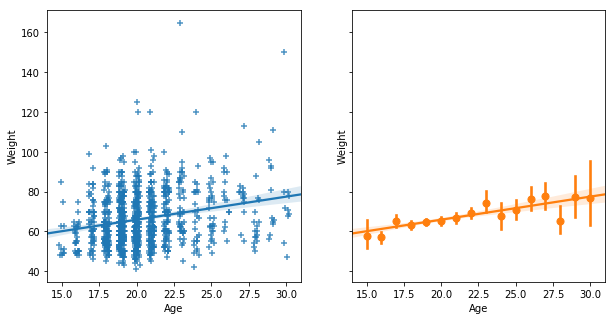

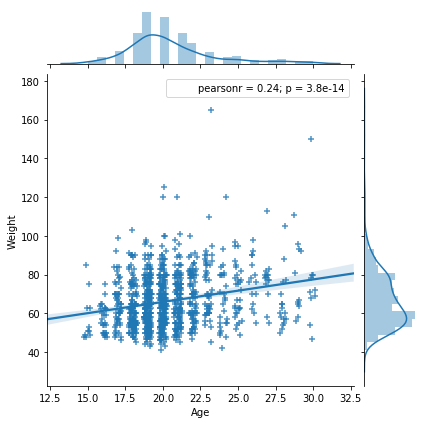

In [9]:
#plot de correlación
fig, ax = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
sns.regplot(x='Age', y='Weight', data=dataset, marker='+', x_jitter=.2, ax=ax[0])
sns.regplot(x='Age', y='Weight', data=dataset, x_estimator=np.mean, ax=ax[1])

# plot de distribución conjunta CON correlación
sns.jointplot(y="Weight", x="Age", data=dataset, kind="reg", x_jitter=.25, marker='+')

## Variables Categóricas

Para el análisis de variables categóricas, vamos a ver las distribuciones de probabilidad de cada variable por separado, y su distribución conjunta. Para ello vamos a mostrar una tabla de contingencia de ambas variables, seguído de gráficos de barra discriminados por las dos variables consideradas

Alcohol,drink a lot,never,social drinker
Smoking,,,
current smoker,0.078,0.011,0.099
former smoker,0.055,0.011,0.109
never smoked,0.015,0.061,0.131
tried smoking,0.072,0.039,0.319


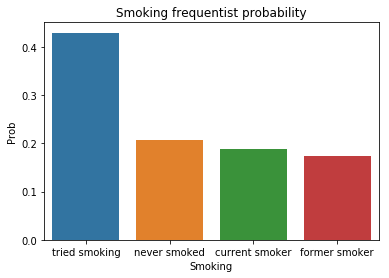

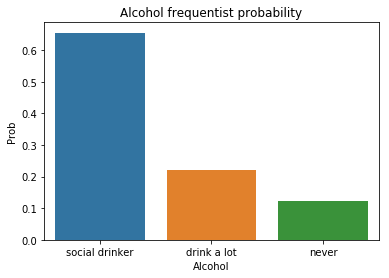

<Figure size 432x288 with 0 Axes>

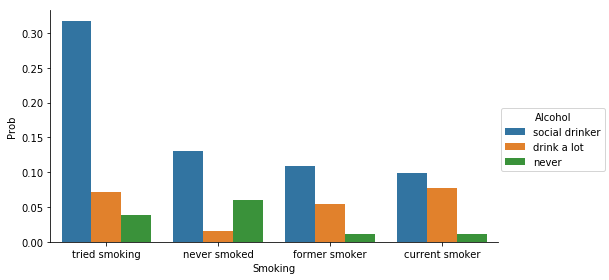

In [10]:
# Calcular la probabilidad marginal y conjunta, y la correlación entre otras dos variables, por ejemplo consumo de alcohol y tabaquismo.
# Representar visualmente la probabilidad conjunta entre los valores posibles de las variables elegidas.

# funciones..
def freq_joint_prob(columns):
    """Returns joint probabilities for columns given."""
    max_count = max([dataset[col].notnull().sum() for col in columns])
    res = dataset.groupby(columns).size().div(max_count).sort_values(ascending=False).reset_index()
    res.rename(columns = {0: 'Prob'}, inplace = True)
    return res

def plot_univ_distrib(columns):
    """Plots every (categorical) column in columns, passed as strings"""
    for col in columns:
        sns.barplot(y='Prob', x=col, data=freq_joint_prob([col]))\
            .set_title(col + ' frequentist probability')
        plt.figure()

def plot_bivariete(columns):
    """Plots joint probability distribution in barplots"""
    data = freq_joint_prob(columns)
    sns.factorplot(y="Prob", x=columns[0],hue=columns[1], data=data, kind="bar", size=4, aspect=1.8, orient='v')

# usos de funciones
plot_univ_distrib(['Smoking', 'Alcohol'])
plot_bivariete(['Smoking', 'Alcohol'])

# tabla de distribución de probabilidad categoricas (ambas)
smoking_alcohol = pd.crosstab(dataset.Smoking, dataset.Alcohol, normalize=True) # TODO: heatmap de probabilidades de la tabla de abajo.
smoking_alcohol


## Análisis de correlación

Vamos a mostrar dos acercamientos al análisis de correlación. En un primer momento, se forzó un orden entre las categorías de cada variable, para hacer cálculos propios de un análisis de variable numerica. A continuación se muestran los resultados.

          Smoking   Alcohol
Smoking  1.000000  0.327498
Alcohol  0.327498  1.000000


/Users/andres/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


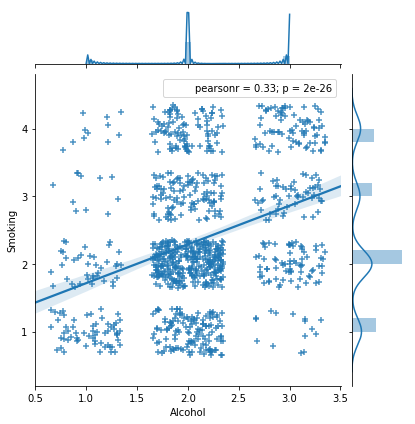

In [11]:
dat2 = dataset[['Smoking', 'Alcohol']]
smk_map = {'never smoked': 1, 'tried smoking': 2, 'former smoker': 3, 'current smoker': 4}
alc_map = {'never': 1, 'social drinker': 2, 'drink a lot': 3}
dat2 = dat2.replace({'Smoking': smk_map, 'Alcohol': alc_map})
print(dat2.corr())
sns.jointplot(y="Smoking", x="Alcohol", data=dat2, kind="reg", x_jitter=.35, y_jitter=.35, marker='+')

Dado un coeficiente de pearson de 0.33, se puede decir que no existe correlación entre las variables. Es de notar la arbitrariedad, tanto en la transformación a variables numericas sobre escalas unitarias (1, 2, 3), como al trazar distinciones como que _un ex-fumador es menos fumador que una persona que actualmente fuma_.


Vamos ahora a realizar un test de hipótesis sobre la correlación de las variables consideradas. Tomaremos como hipótesis nula 'las variables son independientes', tomando como estadístico de prueba  

$$\chi^2=\sum_{} \frac{(f_0 - f_e)^2}{f_e}$$

Tal formula sigue una distribución **$\chi^2$** con (i-1) * (j-1) grados de libertad.

se puede ver más abajo el p-valor de $H_0$

In [12]:
def categorical_variable_correlation(dataset, columns):
    """
    computes correlation of dataframe `dataset` on two categorical columns given in `columns`
    returns 1-pvalue over h0: 'data is independent', against h1: 'data is correlated';
    that is: with higher probability returned, there's a higher evidence to reject h0.
    """
    crost = pd.crosstab(dataset[columns[0]], dataset[columns[1]])
    total = crost.sum().sum()
    crost.loc['Total']= crost.sum(0)
    crost['Total'] = crost.sum(1)
    expected_crost = crost.apply(lambda x: (crost['Total'][x.index]) * crost[x.name]['Total'] / total)
    test_statistic = ((crost - expected_crost)**2 / expected_crost).sum().sum()
    df = (crost.shape[0]-1) * (crost.shape[1]-1)
    # degrees of freedom
    p_val_compl = chi2.cdf(test_statistic, df=df)
    return p_val_compl

def prety_print(dataset, cols):
    value = categorical_variable_correlation(dataset, [cols[0], cols[1]])
    print('{} with {}; 1-P_Value: {}'.format(cols[0], cols[1], value))

prety_print(dataset, ('Smoking', 'Alcohol'))

Smoking with Alcohol; 1-P_Value: 1.0


Esto indica que el p-valor de nuestro test de hipótesis es muy cercano a cero, con lo cual se puede rechazar la hipótesis nula. Esto podría llevarnos a afirmar tal vez que las variables esten correlacionadas.